<a href="https://colab.research.google.com/github/JohnMakgakgaDS/ML-intern-Cognifyz/blob/main/mltask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task: Cuisine Classification

Objective: Develop a machine learning model to
classify restaurants based on their cuisines.


*   Preprocess the dataset by handling missing values
and encoding categorical variables.



In [1]:
#Load data from the local machine into colab
from google.colab import files

uploaded = files.upload()

Saving Dataset.csv to Dataset (1).csv


In [2]:
#Libraries or data science packages to be used along the program tasks

import pandas as pd
import numpy as np



In [3]:
# Assuming the uploaded file is in CSV format, load it into a pandas DataFrame
# Replace 'your_file.csv' with the actual file name you uploaded
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name)

# View the first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
#display shape of the dataset
df.shape

(9551, 21)

There are 9551 rows in the dataset
There are 21 columns in the dataset

#check missing values in each column

In [5]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


There's 9 missing values in column Cuisines

Handling missing values for Cuisines

In [12]:
 #Fill missing values with a placeholder
df['Cuisines'].fillna('Unknown', inplace=True)


<ipython-input-12-ea5a34f7acc5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna('Unknown', inplace=True)


In [13]:
#checking for validation
df.isnull().sum()

,0
Restaurant ID,0
Country Code,0
Longitude,0
Latitude,0
Cuisines,0
Average Cost for two,0
Has Table booking,0
Has Online delivery,0
Is delivering now,0
Switch to order menu,0


Filled missing values with Unknown , There are no missing values .

In [14]:
# Check the data types of each column
print(df.dtypes)


Restaurant ID             int64
Country Code              int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [16]:
# Drop non-numeric columns, such as restaurant names or descriptions
df = df.drop(columns=['Restaurant Name', 'City','Address','Locality','Locality Verbose','Currency'])


Encoding feature Cuisines

In [17]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
data_encoded = pd.get_dummies(df, drop_first=True)

# Alternatively, Label encoding for ordinal features
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Cuisines'] = encoder.fit_transform(df['Cuisines'])


In [18]:
#Validation
df['Cuisines'].head()

,Cuisines
0,920
1,1111
2,1671
3,1126
4,1122


#Encoding categorical variables

In [19]:
df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})
df['Is delivering now'] = df['Is delivering now'].replace({'Yes': 1, 'No': 0})
df['Switch to order menu'] = df['Switch to order menu'].replace({'Yes': 1, 'No': 0})
df['Rating text'] = df['Rating text'].replace({'Poor': 0, 'Not rated': 1,'Average':2,'Good':3,'Very Good':4,'Excellent':5 })
df['Rating color'] = df['Rating color'].replace({'Red': 0, 'White': 1,'Orange':2,'Yellow':3,'Green':4,'Dark Green':5 })

<ipython-input-19-b147e7f11672>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Table booking'] = df['Has Table booking'].replace({'Yes': 1, 'No': 0})
<ipython-input-19-b147e7f11672>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes': 1, 'No': 0})
<ipython-input-19-b147e7f11672>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fa

In [20]:
#Validation
df.iloc[0:5,10:21]

,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3,4.8,5,5,314
1,3,4.5,5,5,591
2,4,4.4,4,4,270
3,4,4.9,5,5,365
4,4,4.8,5,5,229


#Define features and set target variable

In [22]:
# Define features (X) and target (y)
X = ['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Price range','Rating color','Rating text','Cuisines']
y = 'Cuisines'
# Define features (X) and target (y)
X = df.drop('Cuisines', axis=1)
y = df['Cuisines']



In [23]:
X.head()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,162,121.027535,14.565443,1100,1,0,0,0,3,4.8,5,5,314
1,6304287,162,121.014101,14.553708,1200,1,0,0,0,3,4.5,5,5,591
2,6300002,162,121.056831,14.581404,4000,1,0,0,0,4,4.4,4,4,270
3,6318506,162,121.056475,14.585318,1500,0,0,0,0,4,4.9,5,5,365
4,6314302,162,121.057508,14.584450,1500,1,0,0,0,4,4.8,5,5,229


#Feature Selection

#Split the data into training and testing sets.

In [24]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Select and Train a Algorithms

In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
model = LogisticRegression(max_iter=200,C=1.0,n_jobs=-1)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200, n_jobs=-1)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the model


rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Get classification report for precision, recall, and f1-score
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.1287
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [40]:
# Get unique classes from y_test and y_pred
unique_classes = np.unique(np.concatenate((y_test, y_pred)))

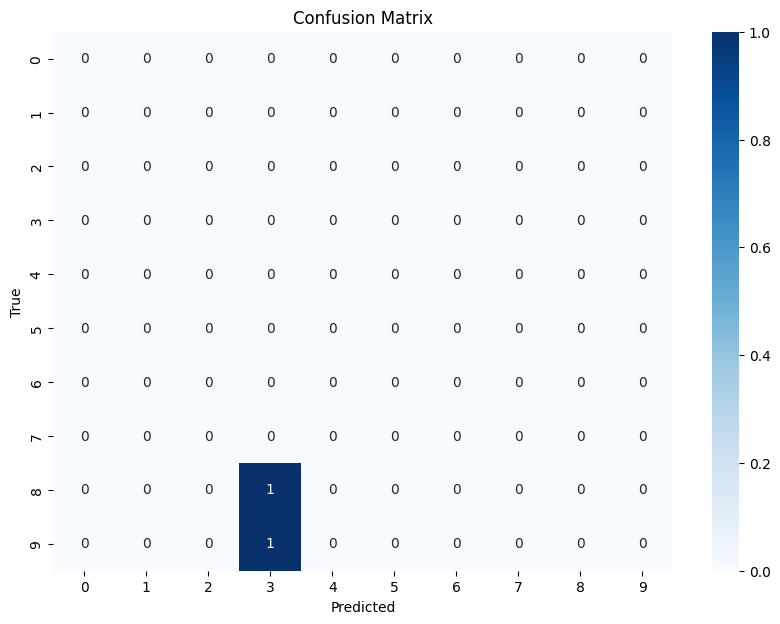

In [37]:
# Import the required libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Create the DataFrame with the correct indices and columns
cm_df = pd.DataFrame(cm, index=unique_classes, columns=unique_classes)

# Limit to the first n classes (for example, first 10)
n_classes = 10  # Adjust this value as needed
cm_limited = cm[:n_classes, :n_classes]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_limited, annot=True, fmt="d", cmap="Blues",
            xticklabels=encoder.classes_[:n_classes],
            yticklabels=encoder.classes_[:n_classes])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


